## Importando e separando os dados do INMET

### Importando e separando dados do INMET

In [1]:
#Definindo período dos dados
AnoI=2019
AnoF=2022
Mes="07"
DiaF=7

#Imports
import requests
import pandas as pd
import json

#reset de variável
dados_filtrados=0

#Anos loop request
for Ano in range(AnoI, AnoF):
  url = "https://apitempo.inmet.gov.br/estacao/"+str(Ano)+"-"+Mes+"-"+str(DiaF+1)+"/"+str(Ano+1)+"-"+Mes+"-"+str(DiaF)+"/A201"
  resultado = requests.get(url)
  dados = resultado.json()
  ##Convertendo em um DataFrame e filtrando
  dados_str = json.dumps(dados)
  dados_tabela = pd.read_json(dados_str)
  dados_tabela_separados = dados_tabela[["DT_MEDICAO","HR_MEDICAO","RAD_GLO","TEM_INS","UMD_INS"]]
  #Verifica se dados_filtrados já tem uma tabela
  if (type(dados_filtrados) is int):
    dados_filtrados = dados_tabela_separados
  else:
    dados_filtrados = pd.DataFrame(dados_filtrados)
    dados_tabela_separados = pd.DataFrame(dados_tabela_separados)
    ds = [dados_filtrados, dados_tabela_separados]
    #Junção das tabelas
    dados_filtrados = pd.concat(ds, ignore_index=True)

print(dados_filtrados)

       DT_MEDICAO  HR_MEDICAO  RAD_GLO  TEM_INS  UMD_INS
0      2019-07-08           0      0.5     24.6     87.0
1      2019-07-08         100      1.1     24.8     87.0
2      2019-07-08         200      0.0     25.3     85.0
3      2019-07-08         300      0.0     25.1     85.0
4      2019-07-08         400      0.1     25.2     85.0
...           ...         ...      ...      ...      ...
26299  2022-07-07        1900    124.9     24.9     93.0
26300  2022-07-07        2000     73.6     24.8     90.0
26301  2022-07-07        2100     45.9     24.6     93.0
26302  2022-07-07        2200      4.7     24.4     95.0
26303  2022-07-07        2300      0.1     24.7     94.0

[26304 rows x 5 columns]


## Lidando com NAs e ajustando dados

### Umidade

In [2]:
import matplotlib.pyplot as plt


#Coluna umidade com NAs
coluna_umidade_cNAs = dados_filtrados[["UMD_INS"]]
#Numero de NAs
print("Numero de NAs na umidade",coluna_umidade_cNAs.isna().sum())
#Correção linear de NAs
coluna_umidade = coluna_umidade_cNAs.interpolate(method="linear")
#Numero de NAs final 
print("Numero de NAs na umidade",coluna_umidade.isna().sum())

#Gráficos de NAS
#coluna_umidade_cNAs.plot(figsize=(22,4), label="original")
#coluna_umidade.plot(figsize=(22,4),style=["--"],label="Com correção linear")
#plt.legend()
#print(coluna_umidade)

#Atribuição final
import numpy as np
import datetime
#Umidade
inicio = str(AnoI)+"-"+Mes+"-"+str(DiaF+1)
indice = pd.date_range(inicio, freq = 'H', periods = len(coluna_umidade[["UMD_INS"]]))

umidade = coluna_umidade[["UMD_INS"]]
umidade.index = indice
#umidade

Numero de NAs na umidade UMD_INS    2755
dtype: int64
Numero de NAs na umidade UMD_INS    0
dtype: int64


### Temperatura

In [3]:
#Coluna temperatura com NAs
coluna_temperatura_cNAs = dados_filtrados[["TEM_INS"]]
#Numero de NAs
print("Numero de NAs na temperatura",coluna_temperatura_cNAs.isna().sum())
#Correção linear de NAs
coluna_temperatura = coluna_temperatura_cNAs.interpolate(method="linear")
#Numero de NAs final 
print("Numero de NAs na temperatura",coluna_temperatura.isna().sum())

#Gráficos de NAS
#coluna_temperatura_cNAs.plot(figsize=(22,4), label="original")
#coluna_temperatura.plot(figsize=(22,4),style=["--"],label="Com correção linear")
#plt.legend()
#print(coluna_temperatura)

#Atribuição final
#temperatura
temperatura = coluna_temperatura[["TEM_INS"]]
temperatura.index = indice
#temperatura

Numero de NAs na temperatura TEM_INS    2535
dtype: int64
Numero de NAs na temperatura TEM_INS    0
dtype: int64


### Radiação

In [4]:
#Função de correção dos valores negativos
def correct_neg(x):
  if (type(x)==str):
    return x
  else:
    if (x<0):
      return 0
    else:
      return x

In [5]:
#Coluna radiação com NAs
coluna_radiacao_cNAs_0 = dados_filtrados[["RAD_GLO"]]
#Correção de números negativos
#fazer coluna_radiacao_cNAs = x for x em coluna_radiacao_0 se um dos elementos de coluna for maior que 0, se não igualar a zero
coluna_radiacao_cNAs_0["RAD_GLO"] = [correct_neg(x) for x in coluna_radiacao_cNAs_0["RAD_GLO"]]
#print(coluna_radiacao_cNAs_0)
coluna_radiacao_cNAs = coluna_radiacao_cNAs_0

#Numero de NAs
print("Numero de NAs na radiação",coluna_radiacao_cNAs.isna().sum())
#Correção linear de NAs
coluna_radiacao = coluna_radiacao_cNAs.interpolate(method="linear")
#Numero de NAs final 
print("Numero de NAs na radiação",coluna_radiacao.isna().sum())

#Gráficos de NAS
#coluna_radiacao_cNAs.plot(figsize=(22,4), label="original")
#coluna_radiacao.plot(figsize=(22,4),style=["--"],label="Com correção linear")
#plt.legend()
#print(coluna_radiacao)

#temperatura
radiacao = coluna_radiacao[["RAD_GLO"]]
radiacao.index = indice
#radiacao

Numero de NAs na radiação RAD_GLO    2533
dtype: int64
Numero de NAs na radiação RAD_GLO    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Análise dos dados

### Análise de umidade

In [6]:
#!pip install statsmodels
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
from statsmodels.tsa.arima.model import ARIMA

##print(umidade)
#umidade.plot(figsize=(20,6))
##umidade.describe()

####Análise de tendencia, sazonalidade e residuos

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
#AnlUmid = seasonal_decompose(umidade)
#fig = plt.figure(figsize=(8,6))
#fig = AnlUmid.plot()

In [9]:
#meses
percentual = int(len(umidade)*0.95)
parteU = umidade[percentual:]
#AnlpartUmid = seasonal_decompose(parteU)
#figpart = plt.figure(figsize=(8,6))
#figpart = AnlpartUmid.plot()


####Teste de estacionariedade

In [10]:
from statsmodels.tsa.stattools import adfuller

##teste de estacionariedade
#estU = adfuller(umidade)
#print(f'teste ADF:{estU[0]}')
#print(f'p-valor:{estU[1]}')
##p-valor muito baixo, ou seja é estacionária

In [11]:
## teste de estacionariedade com diferenciação do valor atual - anterior
#estU = adfuller(umidade.diff().dropna())
#print(f'teste ADF:{estU[0]}')
#print(f'p-valor:{estU[1]}')

####Verificação de autocorrelação

In [12]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [13]:
#autocorrelation_plot(umidade)
#pyplot.show()

In [14]:
#autocorrelation_plot(parteU)
#pyplot.show()

In [15]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [16]:
#plot_acf(umidade, lags = 8000)
#pyplot.show()

##Em 24 lags ocorre a primeira repetição (o que se)
##Em 4000 a auto correlação diminue para mais ou menos 50%
##Depois de 7000  e pouco fica abaixo do nível de significância (observar 8000)
##Aparentemente por volta de 7200 lags (é interessante pois 24x365 é 8760)

####Criando modelo arima

In [17]:
#Arima(p,q,d)
model_U = ARIMA(umidade, order=(24,0,1))
#foi testada a configuração (7200,0,1) e o fit demorou mais q 20 min e n terminou
#teste 400 lags o fit tbm tava demorando mt
#teste 24 lags 13min

In [18]:
#Execut modelo
model_U_fit = model_U.fit()

In [19]:
#model_U_fit.summary()

#####Teste obtendo predições de 1 dia e comparando com a parte final do grafico de umidade 

In [20]:
predicoes_U = model_U_fit.get_prediction(start=-24)
pred_med_U = predicoes_U.predicted_mean

In [21]:
datas_pred_U = np.asarray(pred_med_U.index)
datas_U = np.asarray(parteU.index)

In [22]:
#plt.figure(figsize=(10,6))
#plt.plot(datas_pred_U, pred_med_U.values, color='red', label='predicao')
#plt.plot(datas_U, parteU.values, label = 'real')
#plt.legend()
#plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#erro medio quadratico, deu aproximadamente 5
#rmse_U = sqrt(mean_squared_error(parteU[-24:].values, pred_med_U.values))
#print(rmse_U)


#####Obtendo previsão

In [24]:
#Preencher com o numero de horas a serem previstas
previsoes_U = model_U_fit.get_forecast(steps=48)
previsao_M_U = previsoes_U.predicted_mean
previsao_M_U.size

48

In [25]:
previsao_M_U[0]

93.34695980462445

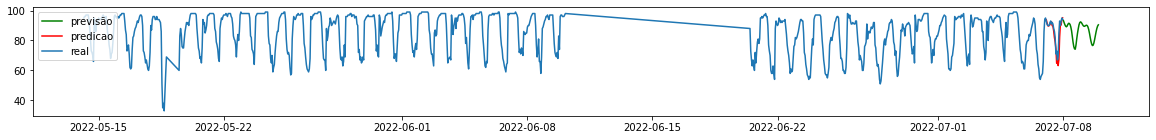

In [26]:
datas_prev_U = np.array(previsao_M_U.index)

plt.figure(figsize=(20,2))
plt.plot(datas_prev_U, previsao_M_U.values, color='green', label='previsão')

plt.plot(datas_pred_U, pred_med_U.values, color='red', label='predicao')
plt.plot(datas_U, parteU.values, label = 'real')
plt.legend(loc='upper left')
plt.show()

In [27]:
print(previsao_M_U)

2022-07-08 00:00:00    93.346960
2022-07-08 01:00:00    91.924206
2022-07-08 02:00:00    90.589547
2022-07-08 03:00:00    89.608454
2022-07-08 04:00:00    89.127962
2022-07-08 05:00:00    89.582784
2022-07-08 06:00:00    90.717012
2022-07-08 07:00:00    91.459525
2022-07-08 08:00:00    91.366683
2022-07-08 09:00:00    90.657424
2022-07-08 10:00:00    89.021246
2022-07-08 11:00:00    86.506186
2022-07-08 12:00:00    82.788168
2022-07-08 13:00:00    78.897443
2022-07-08 14:00:00    75.934784
2022-07-08 15:00:00    74.399380
2022-07-08 16:00:00    74.164795
2022-07-08 17:00:00    77.041470
2022-07-08 18:00:00    81.222517
2022-07-08 19:00:00    84.840769
2022-07-08 20:00:00    87.838436
2022-07-08 21:00:00    90.436475
2022-07-08 22:00:00    91.912589
2022-07-08 23:00:00    92.414350
2022-07-09 00:00:00    92.099292
2022-07-09 01:00:00    91.298350
2022-07-09 02:00:00    90.415978
2022-07-09 03:00:00    89.716980
2022-07-09 04:00:00    89.424199
2022-07-09 05:00:00    89.603188
2022-07-09

### Análise de temperatura

In [28]:
#print(temperatura)
#temperatura.plot(figsize=(20,6))
#temperatura.describe()

In [29]:
#Análise de tendência e sazonalidade e resíduos

#AnlTemp = seasonal_decompose(temperatura)
#fig = plt.figure(figsize=(8,6))
#fig = AnlTemp.plot()

In [30]:
#Análise de tendência e sazonalidade e resíduos da parte final

#meses
percentual = int(len(temperatura)*0.95)
parteT = temperatura[percentual:]
#AnlpartTemp = seasonal_decompose(parteT)
#figpart = plt.figure(figsize=(8,6))
#figpart = AnlpartTemp.plot()

####Teste de estacionariedade

In [31]:
##teste de estacionariedade
#estT = adfuller(temperatura)
#print(f'teste ADF:{estT[0]}')
#print(f'p-valor:{estT[1]}')
##p-valor muito baixo, ou seja é estacionária

In [32]:
## teste de estacionariedade com diferenciação do valor atual - anterior
#estT = adfuller(temperatura.diff().dropna())
#print(f'teste ADF:{estT[0]}')
#print(f'p-valor:{estT[1]}')

####Teste de autocorrelação

In [33]:
#autocorrelation_plot(temperatura)
#pyplot.show()

In [34]:
#plot_acf(umidade, lags = 24)
#pyplot.show()

#Em 5400 lags fica abaixo do nível de significancia
#Repetição em 24 lags

####Criando modelo arima

In [35]:
model_T = ARIMA(temperatura, order=(24,0,1))

In [36]:
#Execut do modelo
model_T_fit = model_T.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [37]:
#model_T_fit.summary()

#####Teste obtendo predições de 1 dia e comparando com a parte final do grafico

In [38]:
predicoes_T = model_T_fit.get_prediction(start=-24)
pred_med_T = predicoes_T.predicted_mean

In [39]:
datas_pred_T = np.asarray(pred_med_T.index)
datas_T = np.asarray(parteT.index)

In [40]:
#plt.figure(figsize=(10,6))
#plt.plot(datas_pred_T, pred_med_T.values, color='red', label='predicao')
#plt.plot(datas_T, parteT.values, label = 'real')
#plt.legend()
#plt.show()

In [41]:
#erro medio quadratico, deu aproximadamente 1
#rmse_T = sqrt(mean_squared_error(parteT[-24:].values, pred_med_T.values))
#print(rmse_T)

#####Obtendo previsão

In [42]:
#Preencher com o numero de horas a serem previstas
previsoes_T = model_T_fit.get_forecast(steps=48)
previsao_M_T = previsoes_T.predicted_mean
previsao_M_T.size

48

In [43]:
previsao_M_T[0]

24.735391178826134

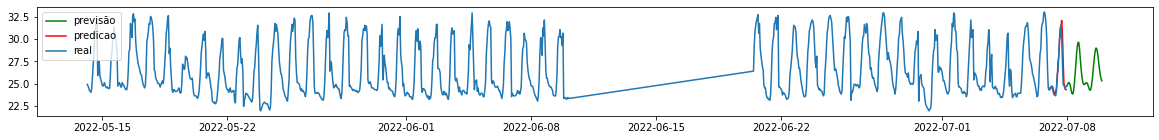

In [44]:
datas_prev_T = np.array(previsao_M_T.index)

plt.figure(figsize=(20,2))
plt.plot(datas_prev_T, previsao_M_T.values, color='green', label='previsão')

plt.plot(datas_pred_T, pred_med_T.values, color='red', label='predicao')
plt.plot(datas_T, parteT.values, label = 'real')
plt.legend(loc='upper left')
plt.show()

In [45]:
#print(previsao_M_T)
#comparei e a previsão de tempertaura do dia seguinte está abtendo certinha com a do google (pelo q vi margem de 2 graus)
#entretanto deve ser levado em consideração q a hora aqui está em relação a greenwich

### Análise de radiação

In [46]:
#print(radiacao)
#radiacao.plot(figsize=(20,6))
#radiacao.describe()

In [47]:
#Análise de tendência e sazonalidade e resíduos

#AnlRad = seasonal_decompose(radiacao)
#fig = plt.figure(figsize=(8,6))
#fig = AnlRad.plot()

In [48]:
#Análise de tendência e sazonalidade e resíduos da parte final

#meses
percentual = int(len(radiacao)*0.95)
parteR = radiacao[percentual:]
#AnlpartRad = seasonal_decompose(parteR)
#figpart = plt.figure(figsize=(8,6))
#figpart = AnlpartRad.plot()

####Teste de estacionariedade

In [49]:
##teste de estacionariedade
#estR = adfuller(radiacao)
#print(f'teste ADF:{estR[0]}')
#print(f'p-valor:{estR[1]}')
##p-valor muito baixo, ou seja é estacionária

In [50]:
## teste de estacionariedade com diferenciação do valor atual - anterior
#estR = adfuller(radiacao.diff().dropna())
#print(f'teste ADF:{estR[0]}')
#print(f'p-valor:{estR[1]}')

####Teste de autocorrelação

In [51]:
#autocorrelation_plot(radiacao)
#pyplot.show()

In [52]:
#plot_acf(radiacao, lags = 24)
#pyplot.show()

#Em 3500 lags fica abaixo do nível de significância
#Em 24 lags primeira repetição

####Criando modelo arima

In [53]:
model_R = ARIMA(radiacao, order=(24,0,1))

In [54]:
#Execut do modelo
model_R_fit = model_R.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [55]:
#model_R_fit.summary()

#####Teste obtendo predições de 1 dia e comparando com a parte final do grafico

In [56]:
predicoes_R = model_R_fit.get_prediction(start=-24)
pred_med_R = predicoes_R.predicted_mean

In [57]:
datas_pred_R = np.asarray(pred_med_R.index)
datas_R = np.asarray(parteR.index)

In [58]:
#plt.figure(figsize=(10,6))
#plt.plot(datas_pred_R, pred_med_R.values, color='red', label='predicao')
#plt.plot(datas_R, parteR.values, label = 'real')
#plt.legend()
#plt.show()

In [59]:
#erro medio quadratico, deu aproximadamente 380
#rmse_R = sqrt(mean_squared_error(parteR[-24:].values, pred_med_R.values))
#print(rmse_R)

#####Obtendo previsão

In [60]:
#Preencher com o numero de horas a serem previstas
previsoes_R = model_R_fit.get_forecast(steps=48)
previsao_M_R = previsoes_R.predicted_mean
previsao_M_R.size

48

In [61]:
previsao_M_R[0]

46.70668495183759

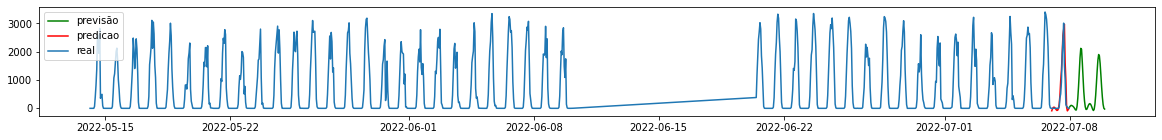

In [62]:
datas_prev_R = np.array(previsao_M_R.index)

plt.figure(figsize=(20,2))
plt.plot(datas_prev_R, previsao_M_R.values, color='green', label='previsão')

plt.plot(datas_pred_R, pred_med_R.values, color='red', label='predicao')
plt.plot(datas_R, parteR.values, label = 'real')
plt.legend(loc='upper left')
plt.show()

In [63]:
print(previsao_M_R)
#A hora aqui está em relação a greenwich

2022-07-08 00:00:00      46.706685
2022-07-08 01:00:00      83.971506
2022-07-08 02:00:00     105.803774
2022-07-08 03:00:00      98.452142
2022-07-08 04:00:00      82.850902
2022-07-08 05:00:00      60.129678
2022-07-08 06:00:00      26.542225
2022-07-08 07:00:00     -17.200633
2022-07-08 08:00:00     -57.793664
2022-07-08 09:00:00     -57.589699
2022-07-08 10:00:00      75.020362
2022-07-08 11:00:00     360.820663
2022-07-08 12:00:00     776.647305
2022-07-08 13:00:00    1283.723430
2022-07-08 14:00:00    1795.229415
2022-07-08 15:00:00    2118.254042
2022-07-08 16:00:00    2090.225467
2022-07-08 17:00:00    1650.299062
2022-07-08 18:00:00    1126.131295
2022-07-08 19:00:00     608.773477
2022-07-08 20:00:00     264.670068
2022-07-08 21:00:00      55.567357
2022-07-08 22:00:00     -37.331401
2022-07-08 23:00:00     -36.278648
2022-07-09 00:00:00      21.202638
2022-07-09 01:00:00      91.243470
2022-07-09 02:00:00     145.033930
2022-07-09 03:00:00     166.047254
2022-07-09 04:00:00 

## Junção para entrega csv

In [64]:
#[["DT_MEDICAO","HR_MEDICAO","RAD_GLO","TEM_INS","UMD_INS"]]
#previsao_M_R
#previsao_M_T
#previsao_M_U
parte = int(len(previsao_M_R)*0.5)
prvdia_M_R = previsao_M_R[parte:]
prvdia_M_T = previsao_M_T[parte:]
prvdia_M_U = previsao_M_U[parte:]
A = pd.concat([prvdia_M_R, prvdia_M_T, prvdia_M_U], axis=1, ignore_index=True)
A.columns = ["RAD_GLO", "TEM_INS", "UMD_INS"]
#print(A)

#B = A.to_csv()
#print(B)

In [65]:
data1 = pd.DataFrame({"2022-07-09"})
data = data1
for i in range(0,23):
  data = [data, data1]
  data = pd.concat(data, ignore_index=True)
#pd.DataFrame(data1)
data.columns = ["DT_MEDICAO"]
print(data)#[["DT_MEDICAO"]]

    DT_MEDICAO
0   2022-07-09
1   2022-07-09
2   2022-07-09
3   2022-07-09
4   2022-07-09
5   2022-07-09
6   2022-07-09
7   2022-07-09
8   2022-07-09
9   2022-07-09
10  2022-07-09
11  2022-07-09
12  2022-07-09
13  2022-07-09
14  2022-07-09
15  2022-07-09
16  2022-07-09
17  2022-07-09
18  2022-07-09
19  2022-07-09
20  2022-07-09
21  2022-07-09
22  2022-07-09
23  2022-07-09


In [66]:
colunaH = pd.Series(range(0,2400,100))
colunaH = pd.DataFrame(colunaH, columns = ['HR_MEDICAO'])
print(colunaH)

    HR_MEDICAO
0            0
1          100
2          200
3          300
4          400
5          500
6          600
7          700
8          800
9          900
10        1000
11        1100
12        1200
13        1300
14        1400
15        1500
16        1600
17        1700
18        1800
19        1900
20        2000
21        2100
22        2200
23        2300


In [67]:
A.index = range(0,24)
print(A)

        RAD_GLO    TEM_INS    UMD_INS
0     21.202638  24.904375  92.099292
1     91.243470  25.014160  91.298350
2    145.033930  25.088300  90.415978
3    166.047254  25.062789  89.716980
4    152.043561  24.904264  89.424199
5    104.685912  24.640720  89.603188
6     33.891968  24.373939  90.002625
7    -38.774579  24.230892  90.219696
8    -77.145510  24.313621  89.956469
9    -31.737278  24.683936  89.055709
10   143.767567  25.333175  87.404295
11   458.369441  26.190090  85.045824
12   877.070395  27.139115  82.277603
13  1324.913390  28.014050  79.659367
14  1701.791878  28.669486  77.647130
15  1900.563413  29.010417  76.617199
16  1855.450708  28.974284  76.844067
17  1584.561601  28.579944  78.334168
18  1184.288618  27.947776  80.625237
19   757.364167  27.218452  83.267466
20   393.764459  26.517521  85.858970
21   137.973478  25.938095  88.058043
22     3.217772  25.532050  89.607034
23   -24.703398  25.296057  90.444941


In [68]:
C = pd.concat([data, colunaH, A], axis=1, ignore_index=False)
print(C)

    DT_MEDICAO  HR_MEDICAO      RAD_GLO    TEM_INS    UMD_INS
0   2022-07-09           0    21.202638  24.904375  92.099292
1   2022-07-09         100    91.243470  25.014160  91.298350
2   2022-07-09         200   145.033930  25.088300  90.415978
3   2022-07-09         300   166.047254  25.062789  89.716980
4   2022-07-09         400   152.043561  24.904264  89.424199
5   2022-07-09         500   104.685912  24.640720  89.603188
6   2022-07-09         600    33.891968  24.373939  90.002625
7   2022-07-09         700   -38.774579  24.230892  90.219696
8   2022-07-09         800   -77.145510  24.313621  89.956469
9   2022-07-09         900   -31.737278  24.683936  89.055709
10  2022-07-09        1000   143.767567  25.333175  87.404295
11  2022-07-09        1100   458.369441  26.190090  85.045824
12  2022-07-09        1200   877.070395  27.139115  82.277603
13  2022-07-09        1300  1324.913390  28.014050  79.659367
14  2022-07-09        1400  1701.791878  28.669486  77.647130
15  2022

In [69]:
C["RAD_GLO"] = [correct_neg(x) for x in C["RAD_GLO"]]
print(C)

    DT_MEDICAO  HR_MEDICAO      RAD_GLO    TEM_INS    UMD_INS
0   2022-07-09           0    21.202638  24.904375  92.099292
1   2022-07-09         100    91.243470  25.014160  91.298350
2   2022-07-09         200   145.033930  25.088300  90.415978
3   2022-07-09         300   166.047254  25.062789  89.716980
4   2022-07-09         400   152.043561  24.904264  89.424199
5   2022-07-09         500   104.685912  24.640720  89.603188
6   2022-07-09         600    33.891968  24.373939  90.002625
7   2022-07-09         700     0.000000  24.230892  90.219696
8   2022-07-09         800     0.000000  24.313621  89.956469
9   2022-07-09         900     0.000000  24.683936  89.055709
10  2022-07-09        1000   143.767567  25.333175  87.404295
11  2022-07-09        1100   458.369441  26.190090  85.045824
12  2022-07-09        1200   877.070395  27.139115  82.277603
13  2022-07-09        1300  1324.913390  28.014050  79.659367
14  2022-07-09        1400  1701.791878  28.669486  77.647130
15  2022

In [70]:
B = C.to_csv()
print(B)

,DT_MEDICAO,HR_MEDICAO,RAD_GLO,TEM_INS,UMD_INS
0,2022-07-09,0,21.202637701608523,24.90437482095261,92.09929165750683
1,2022-07-09,100,91.24347003122182,25.014160255397915,91.29834965619546
2,2022-07-09,200,145.03393047346225,25.088299535740326,90.41597834174515
3,2022-07-09,300,166.04725382454785,25.062788982415853,89.71697995434324
4,2022-07-09,400,152.0435612928817,24.904264468347744,89.42419911266619
5,2022-07-09,500,104.68591181296688,24.640720293099076,89.6031879579397
6,2022-07-09,600,33.89196791479196,24.37393914826191,90.00262494540819
7,2022-07-09,700,0.0,24.230891792771324,90.21969630739005
8,2022-07-09,800,0.0,24.313620804403854,89.95646932567576
9,2022-07-09,900,0.0,24.68393587696281,89.05570938520383
10,2022-07-09,1000,143.7675666905361,25.33317498537798,87.40429524660172
11,2022-07-09,1100,458.36944115320483,26.190090016387288,85.04582411969301
12,2022-07-09,1200,877.0703947957045,27.13911500927789,82.27760338161013
13,2022-07-09,1300,1324.9133898629752,28.014050334049273

In [ ]:
#falta só:
#copiar o csv num bloco de notas
#importar o bloco de notas no exel do drive selecionando q é separado por virgulas e n trasformar letras em numeros
#fazer download escolhendo tipo .csv